# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## 다항 선형 회귀(Multivariable Linear Regression)

<hr/>

### 퀴즈 점수(여러 개의 변수)와 final exam의 상관관계

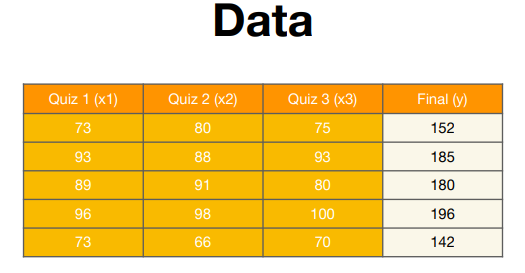

In [2]:
import torch
import torch.optim as optim

In [3]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

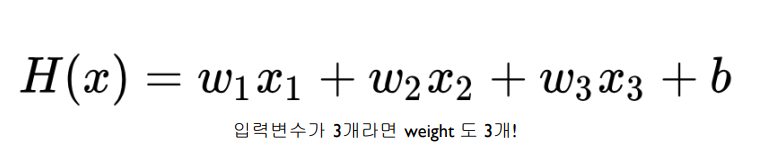


```python
# H(x) 계산
hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
```

만약 변수의 개수가 엄청 많다면?? 일일이 적어주는 것이 불가능해진다.<br/>
pytorch에서 제공해주는 **matmul()** 을 이용하면 한 번에 계산할 수 있다!!

In [6]:
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# H(x) 계산
hypothesis = x_train.matmul(W) + b # or .mm or @

### Cost Function & Gradient Descent

- cost 함수는 기존의 Simple Linear Regression와 공식이 동일하다.

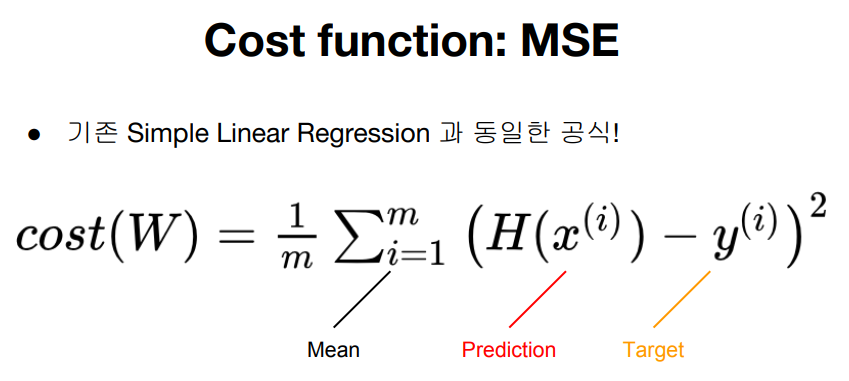

```python
cost = torch.mean((hypothesis - y_train) ** 2)
```

<br/><br/>

- Gradient Descent 공식도 동일하다.

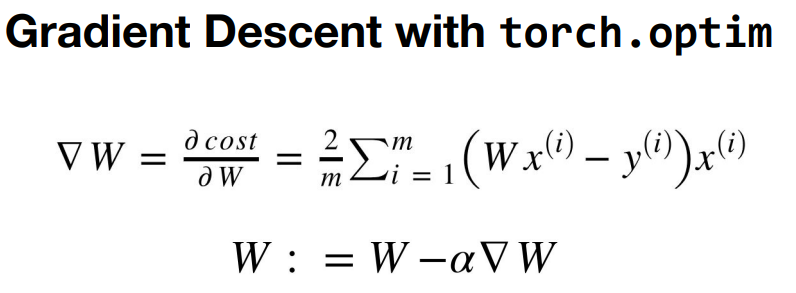

```python
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

# optimizer 사용법
optimizer.zero_grad()
cost.backward()
optimizer.step()
```

<br/>

### 코드 정리

- cost가 점점 작아지는 것을 확인할 수 있다.
- H(x)의 값 또한 y에 점자 가까워진다.
- Learning rate를 잘못 설정하면 cost의 값이 발산할 수도 있으니 주의하자

In [7]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
    epoch, nb_epochs, hypothesis.squeeze().detach(), 
    cost.item()
    ))


Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7968, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936005
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371010
Epoch    6/20 hypothesis: tensor([148.1035, 178.0144, 175.3980, 191.0042, 135.7812]) Cost: 29.758139
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8508, 193.6753, 137.6805]) Cost: 10.445305
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391228
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493135
Epoch   10/20 hypo

<br/>

### nn.Mudule

- 변수와 마찬가지로 W와 b를 일일이 쓰는 것은 모델이 커질수록 귀찮은 일이 된다.
- Pytorch는 이 문제를 해결해주기 위해 nn.Module 이라는 편리한 도구를 제공한다.

```python
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# H(x) 계산
hypothesis = x_train.matmul(W) + b # or .mm or @

```

<br/>

위의 코드를 nn.Module로 바꿔 적어보자

1. nn.Module을 상속해 모델 클래스를 생성
2. nn.Linear(3, 1)
    - 입력 차원: 3
    - 출력 차원: 1
3. Hypothesis 계산은 forward()에서 실행
4. Gradient 계산은 PyTorch가 자동으로 해결

In [11]:
import torch.nn as nn

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        
    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()
hypothesis = model(x_train)

<br/>

### 다양한 cost function

```python
# cost 계산
cost = torch.mean((hypothesis - y_train) ** 2)
```

<br/>

위 코드를 torch.nn.functional에서 제공하는 loss function을 통해 적을 수도 있다.

```python
import torch.nn.functional as F

# cost 계산
cost = F.mse_loss(prediction, y_train)
```

<br/><br/>

### 최종 코드

In [37]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
# W = torch.zeros((3, 1), requires_grad=True)
# b = torch.zeros(1, requires_grad=True)
model = MultivariateLinearRegressionModel()

# optimizer 설정
# optimizer = optim.SGD([W, b], lr=1e-5)
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
 
    # H(x) 계산
    # hypothesis = x_train.matmul(W) + b # or .mm or @
    hypothesis = model(x_train)
    
    # cost 계산
    # cost = torch.mean((hypothesis - y_train) ** 2)
    cost = F.mse_loss(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
    epoch, nb_epochs, hypothesis.squeeze().detach(), 
    cost.item()
     ))


Epoch    0/20 hypothesis: tensor([28.8147, 31.5280, 32.8566, 33.9985, 24.6464]) Cost: 20079.156250
Epoch    1/20 hypothesis: tensor([ 84.1476,  98.0354,  98.3867, 105.3594,  75.3751]) Cost: 6296.421875
Epoch    2/20 hypothesis: tensor([115.1262, 135.2707, 135.0746, 145.3116, 103.7765]) Cost: 1976.265381
Epoch    3/20 hypothesis: tensor([132.4696, 156.1176, 155.6147, 167.6793, 119.6777]) Cost: 622.124451
Epoch    4/20 hypothesis: tensor([142.1792, 167.7893, 167.1142, 180.2021, 128.5804]) Cost: 197.672241
Epoch    5/20 hypothesis: tensor([147.6149, 174.3240, 173.5522, 187.2131, 133.5651]) Cost: 64.627655
Epoch    6/20 hypothesis: tensor([150.6578, 177.9828, 177.1566, 191.1382, 136.3561]) Cost: 22.923777
Epoch    7/20 hypothesis: tensor([152.3611, 180.0314, 179.1744, 193.3357, 137.9189]) Cost: 9.850461
Epoch    8/20 hypothesis: tensor([153.3144, 181.1786, 180.3040, 194.5659, 138.7942]) Cost: 5.751359
Epoch    9/20 hypothesis: tensor([153.8478, 181.8211, 180.9363, 195.2546, 139.2845]) Cost

<br/>

### 깔끔 정리

In [39]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 40255.132812
Epoch    1/20 Cost: 12618.036133
Epoch    2/20 Cost: 3955.270996
Epoch    3/20 Cost: 1239.955078
Epoch    4/20 Cost: 388.847321
Epoch    5/20 Cost: 122.070656
Epoch    6/20 Cost: 38.449928
Epoch    7/20 Cost: 12.239522
Epoch    8/20 Cost: 4.023888
Epoch    9/20 Cost: 1.448648
Epoch   10/20 Cost: 0.641442
Epoch   11/20 Cost: 0.388380
Epoch   12/20 Cost: 0.309038
Epoch   13/20 Cost: 0.284128
Epoch   14/20 Cost: 0.276297
Epoch   15/20 Cost: 0.273814
Epoch   16/20 Cost: 0.272996
Epoch   17/20 Cost: 0.272716
Epoch   18/20 Cost: 0.272600
Epoch   19/20 Cost: 0.272522
Epoch   20/20 Cost: 0.272473
